In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from tqdm.notebook import tqdm as tqdm

データ読み込み

読み込みファイル名を変更して、複数のデータに対応させる。

time, logN, s.d.のラベルは変更しない。
変更すると読み込みにエラーが発生する。
修正できるのであれば変更可

In [2]:
datafile_name = 'Baranyi_data.csv'
data = pd.read_csv(datafile_name)
data

,time,logN,s.d.
0,0,3.840309,0.122372
1,6,4.258257,0.208042
2,12,5.103908,0.475755
3,24,6.906202,1.321655
4,36,7.690157,0.154119
5,48,7.895098,0.104119
6,60,8.093355,0.107972
7,72,8.145943,0.117801


データを扱いやすい形に分ける

In [3]:
x_data = data['time']
y_data = data['logN']
y_sd = data['s.d.']

予測モデル（数式）の定義
今回はBaranyiモデル

In [4]:
def func(x, logN0_baranyi, logN_max_baranyi, mu_baranyi, lambda_baranyi):
    f = logN_max_baranyi + np.log10((-1+np.exp(mu_baranyi*lambda_baranyi)+np.exp(mu_baranyi*x))/(-1+np.exp(mu_baranyi*x)+np.exp(mu_baranyi*lambda_baranyi)*10**(logN_max_baranyi-logN0_baranyi)))
    return f

curve_fit（最小二乗法）を使って非線形回帰
para_predにパラメータ(logN0_baranyi, logN_max_baranyi, mu_baranyi, lambda_baranyiの順番)、covに共分散が保存される。

In [5]:
para_pred, cov = curve_fit(func,x_data,y_data)
para_pred

array([3.82544785, 7.98832009, 0.34301703, 3.56491193])

予測用の数列作成
time_intervalには0からデータの時間最大値まで１００分割した数列が入る。

In [6]:
time_min = 0
time_max = np.max(data['time'])
devide = 100
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")

予測値の計算
time_intervalにに対応する予測値をy_predに代入

In [7]:
y_pred = func(time_interval, para_pred[0], para_pred[1], para_pred[2], para_pred[3])

作図　＆　pdf保存
pdfは「データファイル名.pdf」で保存される。

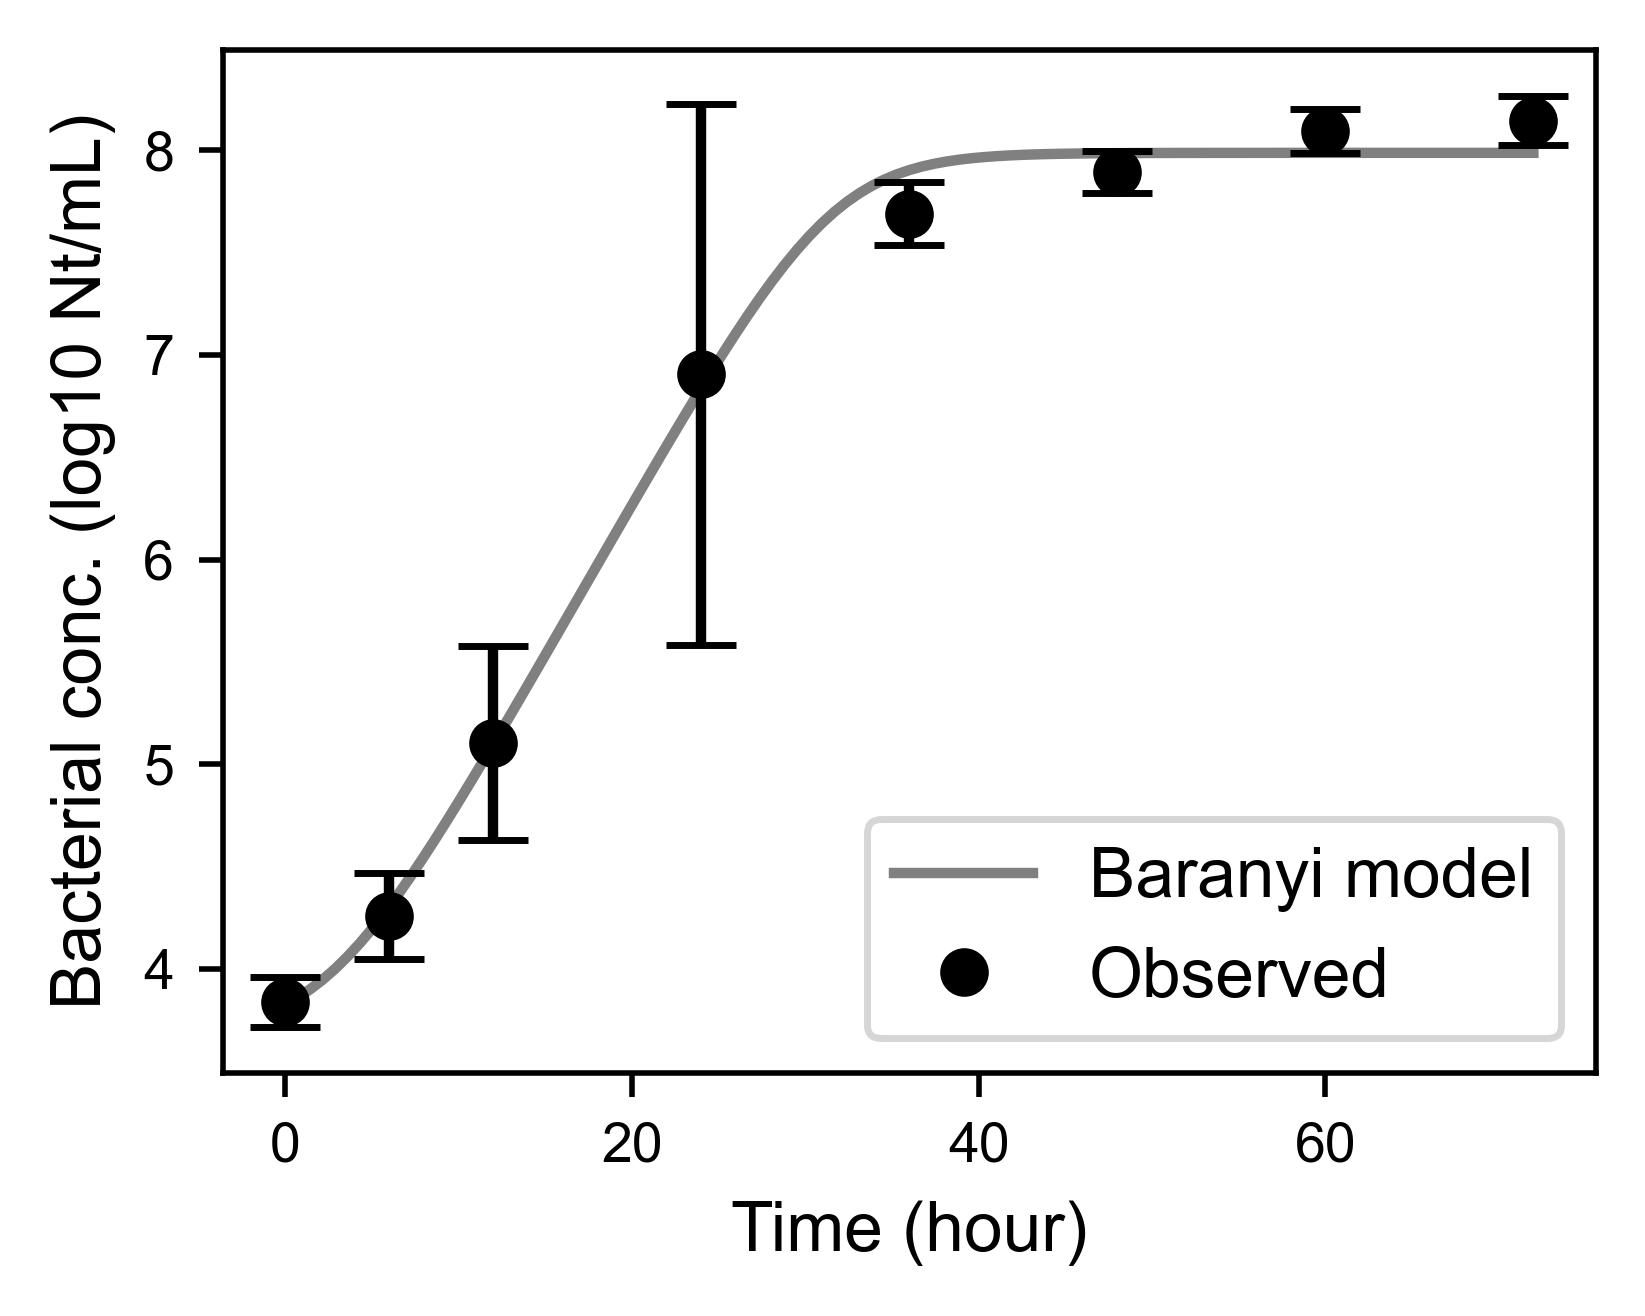

In [8]:
plt.figure(figsize=(9*0.393701,9*0.393701*3/4), dpi=500)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=8)
plt.yticks(size=8)
plt.xlabel("Time (hour)",size=10,fontname="Arial")
plt.ylabel("Bacterial conc. (log10 Nt/mL)",size=10,fontname="Arial")

plt.plot(time_interval, y_pred, color='gray', label='Baranyi model' )
plt.errorbar(data['time'], data['logN'], yerr=y_sd, fmt="none", color='black', capsize = 5)

plt.plot(data['time'], data['logN'], lw=0, marker='o', color='black', label='Observed')

plt.legend()

plt.savefig(datafile_name.replace('.csv', '.pdf'), bbox_inches="tight", dpi=500)

plt.show()